In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('data/raw_data.csv')

In [3]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [4]:
# information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [5]:
# capitalize the column value
df['person_gender'] = df['person_gender'].str.capitalize()
df['person_home_ownership'] = df['person_home_ownership'].str.capitalize()
df['loan_intent'] = df['loan_intent'].str.capitalize()

In [6]:
cols = ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score']
values = {}

for col in cols:
    col_Q1 = df[col].quantile(0.25)
    col_Q3 = df[col].quantile(0.75)
    col_IQR = col_Q3 - col_Q1
    col_lower_bound = col_Q1 - 1.5 * col_IQR
    col_upper_bound = col_Q3 + 1.5 * col_IQR
    values[col] = {
        'Q1': col_Q1,
        'Q3': col_Q3,
        'IQR': col_IQR,
        'Lower Bound': col_lower_bound,
        'Upper Bound': col_upper_bound
    }

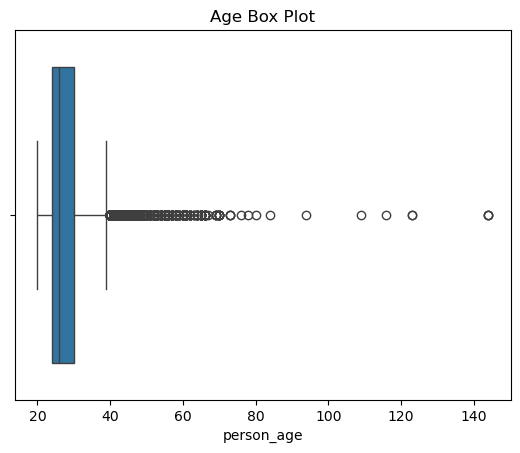

In [7]:
# box plot to detect the outliers
sns.boxplot(x=df['person_age'])
plt.title('Age Box Plot')
plt.show()

In [8]:
# remove age outliers
df = df[(df['person_age'] > values['person_age']['Lower Bound']) & (df['person_age'] < values['person_age']['Upper Bound'])]

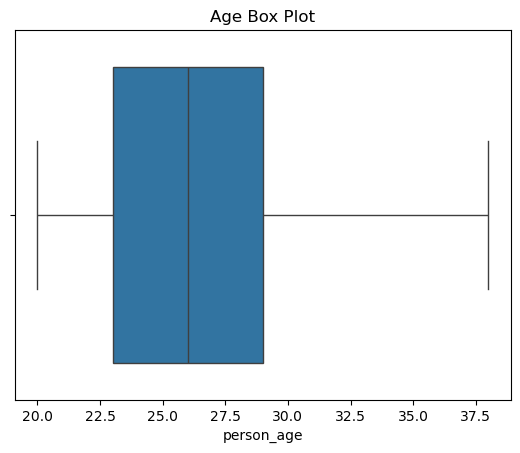

In [9]:
# box plot to after outliers removal
sns.boxplot(x=df['person_age'])
plt.title('Age Box Plot')
plt.show()

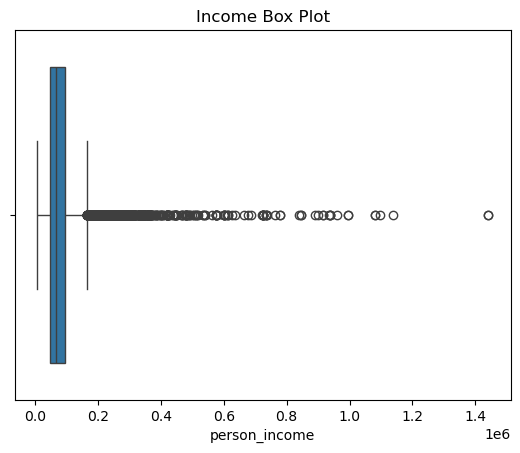

In [10]:
# box plot to detect the outliers
sns.boxplot(x=df['person_income'])
plt.title('Income Box Plot')
plt.show()

In [11]:
# remove income outliers
df = df[(df['person_income'] > values['person_income']['Lower Bound']) & (df['person_income'] < values['person_income']['Upper Bound'])]

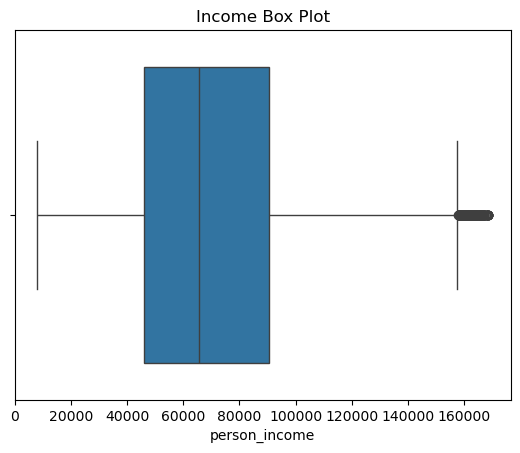

In [12]:
# box plot to after outliers removal
sns.boxplot(x=df['person_income'])
plt.title('Income Box Plot')
plt.show()

In [13]:
df[(df['person_income'] < values['person_income']['Lower Bound']) | (df['person_income'] > values['person_income']['Upper Bound'])]

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status


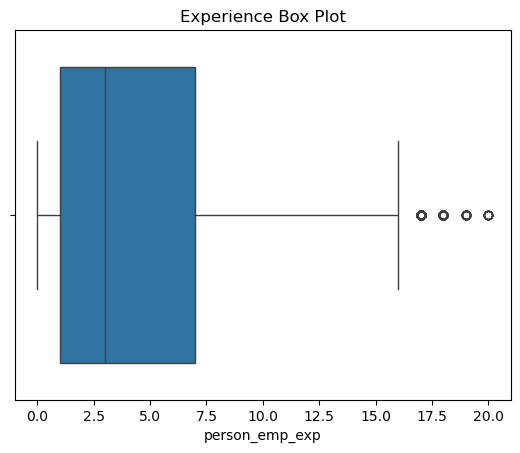

In [14]:
# box plot to detect the outliers
sns.boxplot(x=df['person_emp_exp'])
plt.title('Experience Box Plot')
plt.show()

In [15]:
# remove income outliers
df = df[(df['person_emp_exp'] > values['person_emp_exp']['Lower Bound']) & (df['person_emp_exp'] < values['person_emp_exp']['Upper Bound'])]

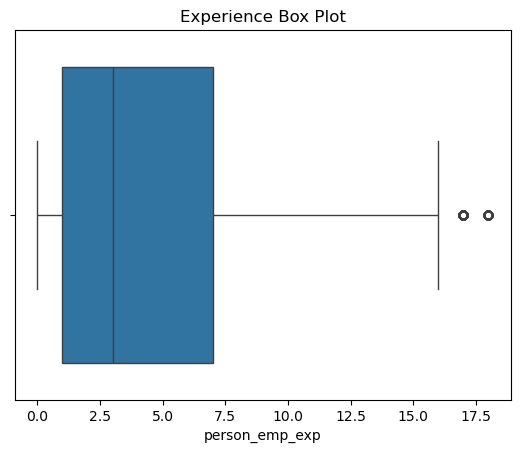

In [16]:
# box plot to after outliers removal
sns.boxplot(x=df['person_emp_exp'])
plt.title('Experience Box Plot')
plt.show()

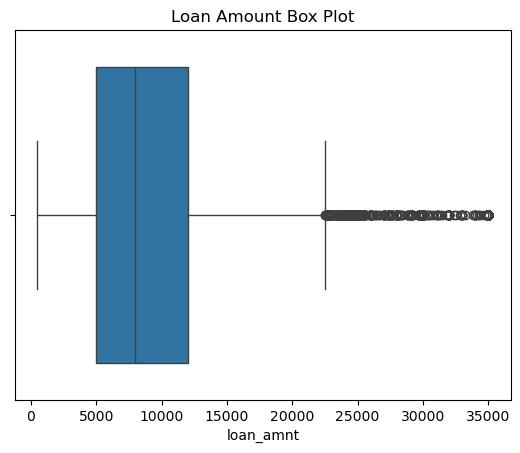

In [17]:
# box plot to detect the outliers
sns.boxplot(x=df['loan_amnt'])
plt.title('Loan Amount Box Plot')
plt.show()

In [18]:
# remove income outliers
df = df[(df['loan_amnt'] > values['loan_amnt']['Lower Bound']) & (df['loan_amnt'] < values['loan_amnt']['Upper Bound'])]

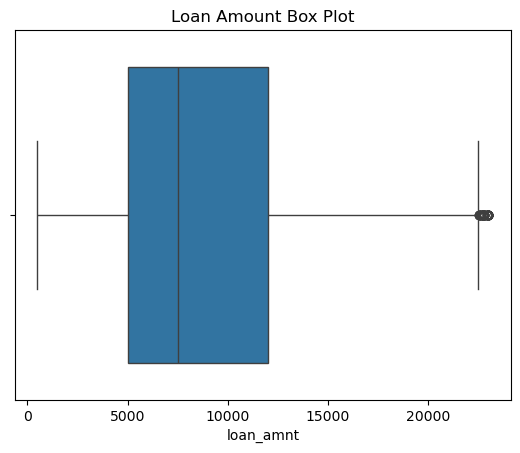

In [19]:
# box plot to after outliers removal
sns.boxplot(x=df['loan_amnt'])
plt.title('Loan Amount Box Plot')
plt.show()

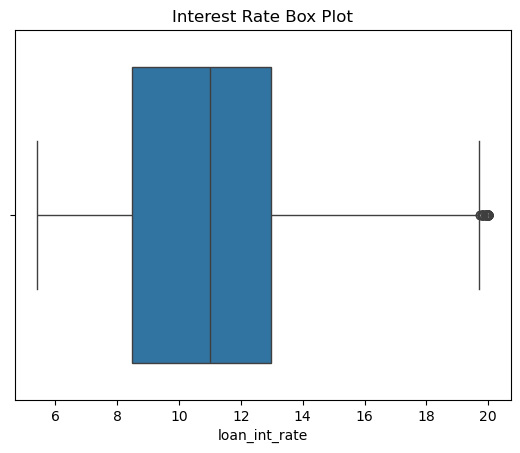

In [20]:
# box plot to detect the outliers
sns.boxplot(x=df['loan_int_rate'])
plt.title('Interest Rate Box Plot')
plt.show()

In [21]:
# remove income outliers
df = df[(df['loan_int_rate'] > values['loan_int_rate']['Lower Bound']) & (df['loan_int_rate'] < values['loan_int_rate']['Upper Bound'])]

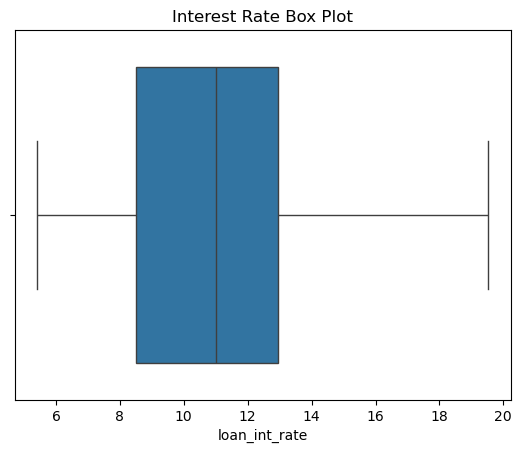

In [22]:
# box plot to after outliers removal
sns.boxplot(x=df['loan_int_rate'])
plt.title('Interest Rate Box Plot')
plt.show()

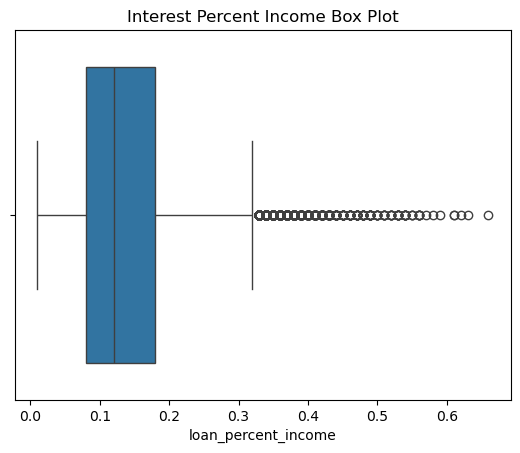

In [23]:
# box plot to detect the outliers
sns.boxplot(x=df['loan_percent_income'])
plt.title('Interest Percent Income Box Plot')
plt.show()

In [24]:
# remove income outliers
df = df[(df['loan_percent_income'] > values['loan_percent_income']['Lower Bound']) & (df['loan_percent_income'] < values['loan_percent_income']['Upper Bound'])]

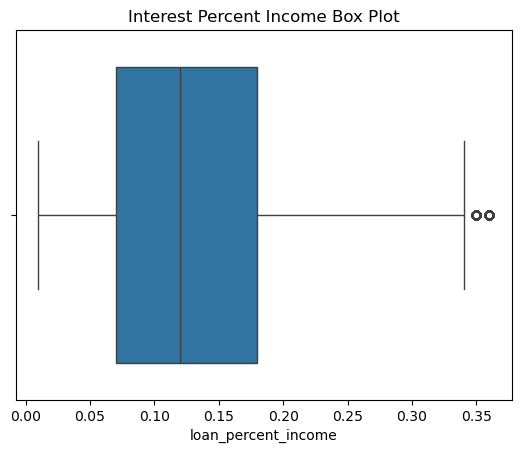

In [25]:
# box plot to after outliers removal
sns.boxplot(x=df['loan_percent_income'])
plt.title('Interest Percent Income Box Plot')
plt.show()

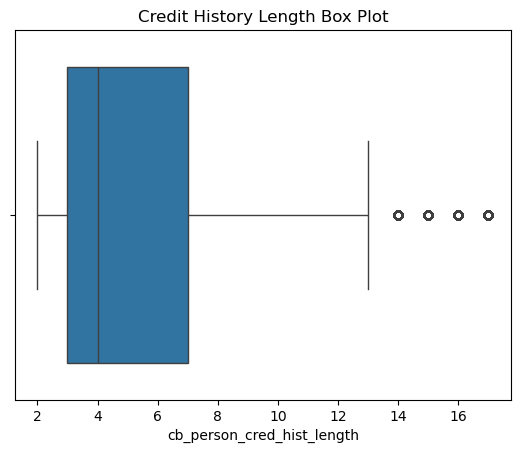

In [26]:
# box plot to detect the outliers
sns.boxplot(x=df['cb_person_cred_hist_length'])
plt.title('Credit History Length Box Plot')
plt.show()

In [27]:
# remove income outliers
df = df[(df['cb_person_cred_hist_length'] > values['cb_person_cred_hist_length']['Lower Bound']) & (df['cb_person_cred_hist_length'] < values['cb_person_cred_hist_length']['Upper Bound'])]

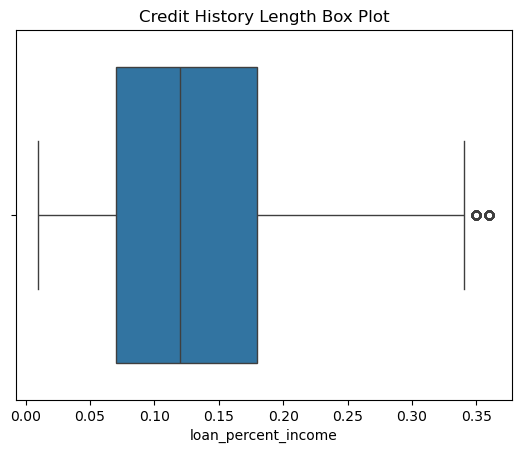

In [28]:
# box plot to after outliers removal
sns.boxplot(x=df['loan_percent_income'])
plt.title('Credit History Length Box Plot')
plt.show()

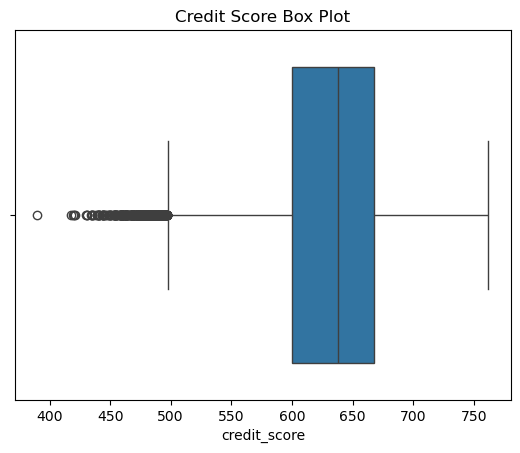

In [29]:
# box plot to detect the outliers
sns.boxplot(x=df['credit_score'])
plt.title('Credit Score Box Plot')
plt.show()

In [30]:
# remove income outliers
df = df[(df['credit_score'] >= values['credit_score']['Lower Bound']) & (df['credit_score'] < values['credit_score']['Upper Bound'])]

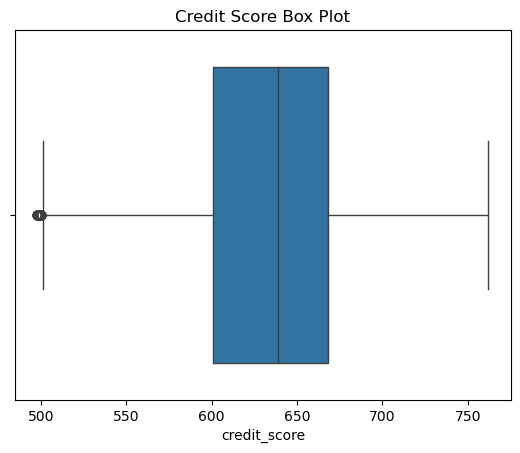

In [31]:
# box plot to after outliers removal
sns.boxplot(x=df['credit_score'])
plt.title('Credit Score Box Plot')
plt.show()

In [33]:
df['loan_status'].value_counts()

loan_status
0    29360
1     7859
Name: count, dtype: int64

In [32]:
df.to_csv('data/clean_data.csv', index=False)